In [ ]:
import pandas as pd

In [ ]:
ds=pd.read_csv('/content/drive/MyDrive/dataset/Salary_Data.csv')

In [ ]:
ds.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
X = ds.iloc[:, :-1].values
Y = ds.iloc[:, 1].values
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
print('Shape of X=',X.shape)
print('Shape of Y=',Y.shape)

Shape of X= (30, 1)
Shape of Y= (30,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

print('Shape of X_train =', X_train.shape)
print('Shape of Y_train =', Y_train.shape)
print('Shape of X_test =', X_test.shape)
print('Shape of Y_test =', Y_test.shape)

Shape of X_train = (24, 1)
Shape of Y_train = (24,)
Shape of X_test = (6, 1)
Shape of Y_test = (6,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
print(X_train)

[[ 1.75832984]
 [-0.40973925]
 [ 0.09356251]
 [ 1.10016601]
 [-0.83560996]
 [ 0.01613147]
 [-0.7194634 ]
 [-0.21616165]
 [ 1.21631257]
 [ 0.6742953 ]
 [-1.45505827]
 [ 2.10676952]
 [-0.79689444]
 [-1.1066186 ]
 [ 0.32585562]
 [ 0.36457114]
 [-0.52588581]
 [-0.7194634 ]
 [ 1.52603672]
 [-1.18404964]
 [-1.53248931]
 [ 0.79044186]
 [-0.06129957]
 [-0.40973925]]


In [ ]:
print(X_test)

[[-1.37762723]
 [ 2.02933848]
 [-0.37102373]
 [-0.44845477]
 [ 1.71961432]
 [ 1.40989017]]


In [ ]:
print(Y_train)
print(Y_test)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
lr.coef_

array([24053.85556857])

In [ ]:
lr.intercept_

73886.20833333333

In [ ]:
X_test[0,:]

array([-1.37762723])

In [ ]:
print(Y_train)

[112635.  55794.  83088. 101302.  56642.  66029.  64445.  61111. 113812.
  91738.  46205. 121872.  60150.  39891.  81363.  93940.  57189.  54445.
 105582.  43525.  39343.  98273.  67938.  56957.]


In [ ]:
lr.predict([X_test[0,:]])

array([40748.96184072])

In [ ]:
Y_predict=lr.predict(X_test)
print(Y_predict)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [ ]:
Y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

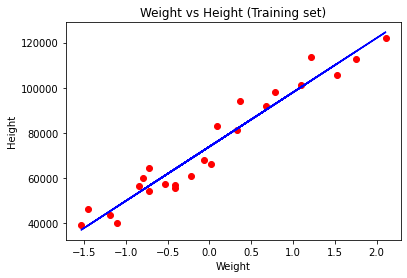

In [ ]:
# Visualising the Training set results 
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Weight vs Height (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

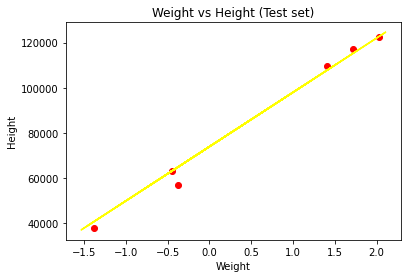

In [ ]:
# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'yellow')
plt.title('Weight vs Height (Test set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y_test,Y_predict)
print(mae)

2446.172369046504


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_predict)
print(mse)

12823412.298126526


In [ ]:
inputexp=1.45
new_X=lr.predict([[inputexp]])
new_X

array([108764.29890775])

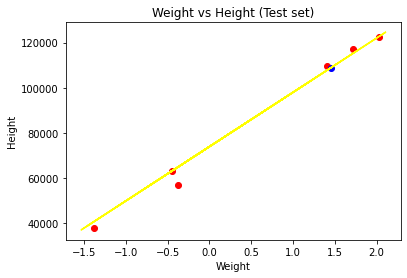

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'yellow')
plt.scatter(inputexp,new_X, color = 'blue')
plt.title('Weight vs Height (Test set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

# New Section